# Predicting Home Sale Prices

## EDA Pre-Processing

### Install Dependencies

In [36]:
!pip install scipy

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

In [2]:
train = pd.read_csv("train.csv")

### Get first look at data

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## There are a few features that are missing a lot of data. I will drop any features that are missing more than 25% of the data

In [6]:
min_count =  int(((100-25)/100)*train.shape[0] + 1)
train = train.dropna(axis=1, thresh=min_count)

## Separate numericals from categoricals

In [7]:
nums = train.select_dtypes(exclude=['object'])
categoricals = train.select_dtypes('object')

In [8]:
nums.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [9]:
categoricals.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


## Look at correlations

<AxesSubplot:title={'center':'Correlations Between Numerical Variables'}>

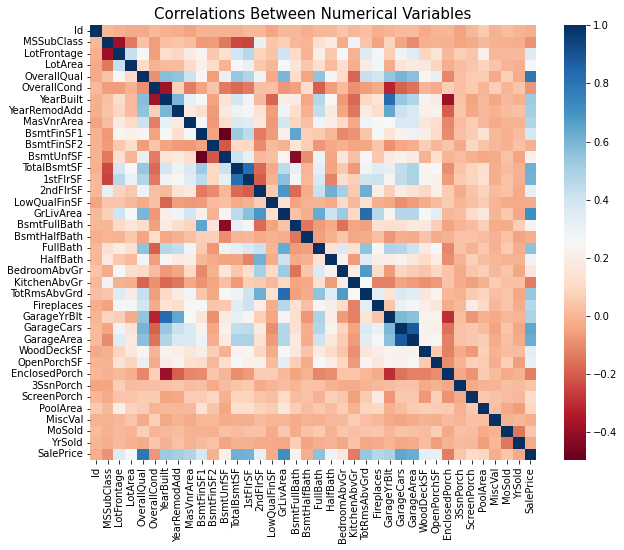

In [13]:
plt.figure(figsize=(10,8))
plt.title("Correlations Between Numerical Variables", size=15)
plt.rc('axes', labelsize=50)
sns.heatmap(nums.corr(), cmap='RdBu')

# Looking at distributions of Sale Price Averages, grouped in each category

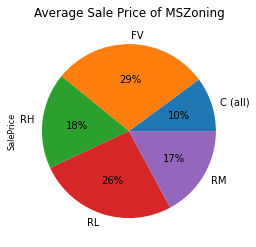

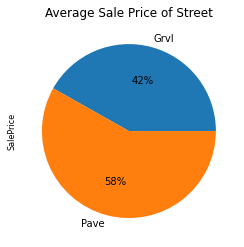

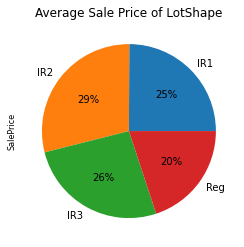

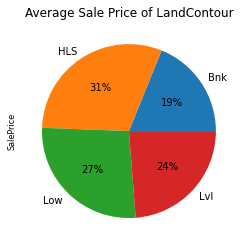

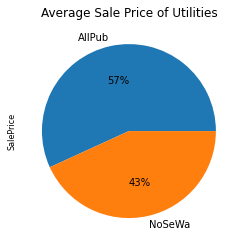

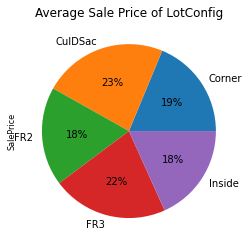

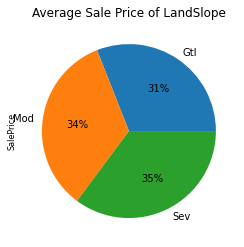

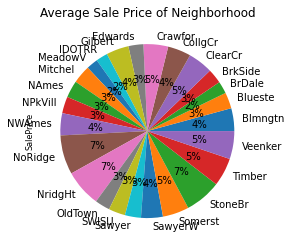

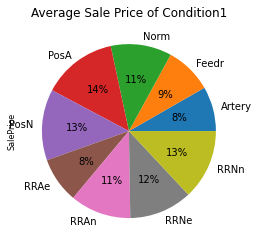

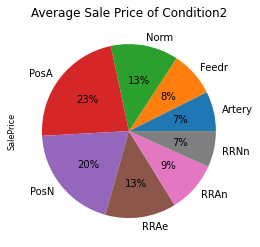

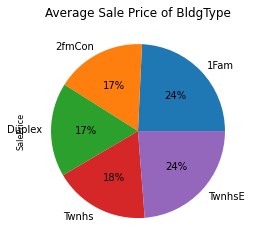

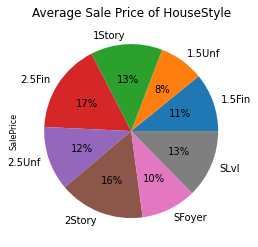

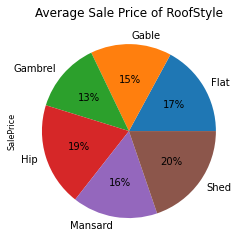

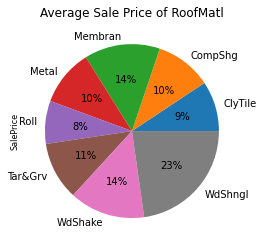

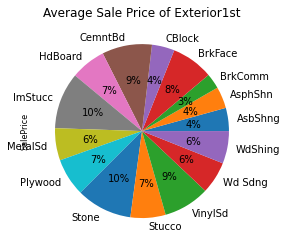

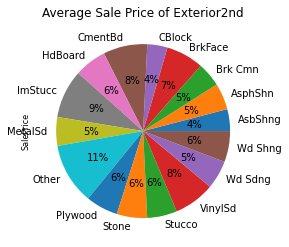

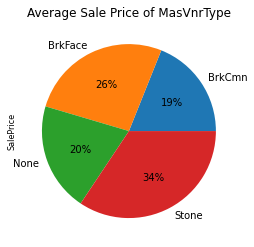

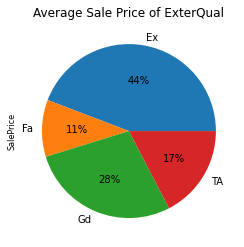

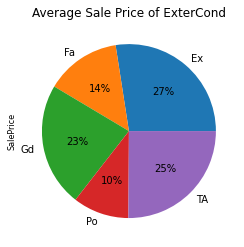

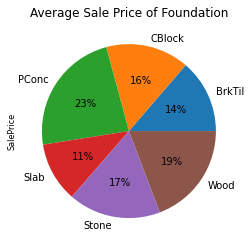

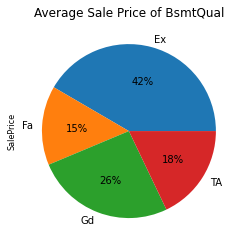

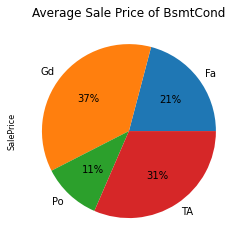

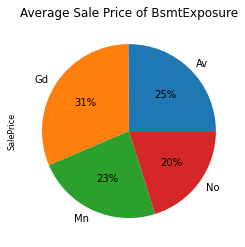

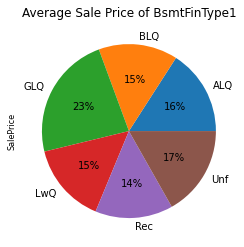

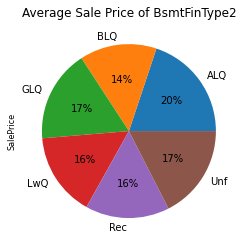

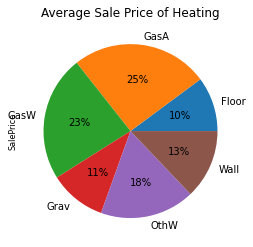

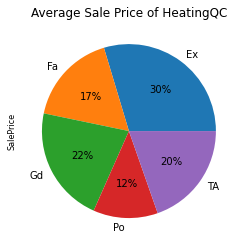

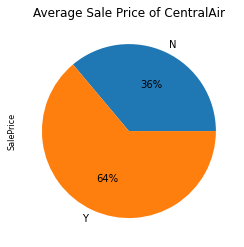

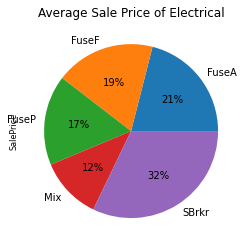

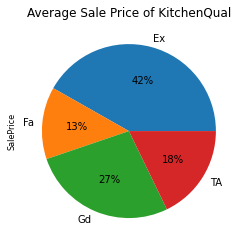

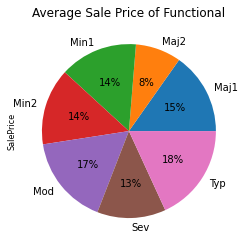

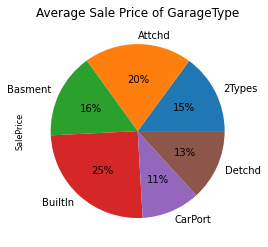

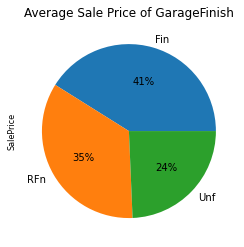

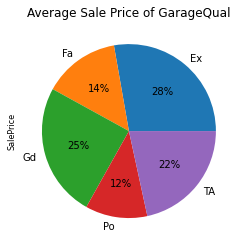

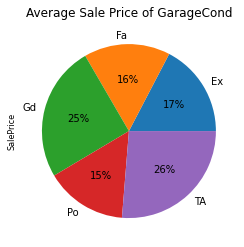

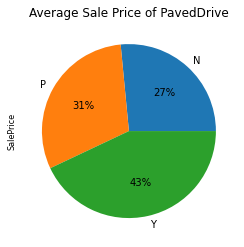

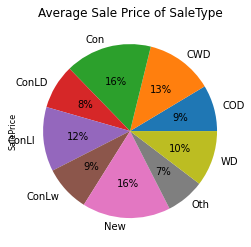

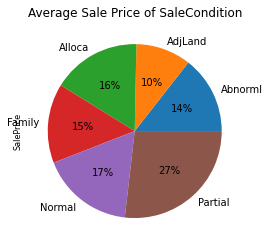

In [126]:
for x in categoricals.columns:
    (train['SalePrice'].groupby(train[x]).mean()).plot(kind='pie',autopct='%1.0f%%')
    plt.title("Average Sale Price of " + x)
    plt.show()

## Feature Selection

### Selecting numerical features that have Medium to High correlation (+- .30)

In [23]:
num_features = list(nums.corr()["SalePrice"][(nums.corr()["SalePrice"]>0.50) | (nums.corr()["SalePrice"]<-0.50)].index)
num_features

['OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'TotalBsmtSF',
 '1stFlrSF',
 'GrLivArea',
 'FullBath',
 'TotRmsAbvGrd',
 'GarageCars',
 'GarageArea',
 'SalePrice']

### Dropping the target value from the numerical feature list

In [26]:
num_features.remove('SalePrice')
num_features

['OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'TotalBsmtSF',
 '1stFlrSF',
 'GrLivArea',
 'FullBath',
 'TotRmsAbvGrd',
 'GarageCars',
 'GarageArea']

### updating the numerical data frame to only contain the features chosen

In [28]:
nums = train[num_features]
nums

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea
0,7,2003,2003,856,856,1710,2,8,2,548
1,6,1976,1976,1262,1262,1262,2,6,2,460
2,7,2001,2002,920,920,1786,2,6,2,608
3,7,1915,1970,756,961,1717,1,7,3,642
4,8,2000,2000,1145,1145,2198,2,9,3,836
...,...,...,...,...,...,...,...,...,...,...
1455,6,1999,2000,953,953,1647,2,7,2,460
1456,6,1978,1988,1542,2073,2073,2,7,2,500
1457,7,1941,2006,1152,1188,2340,2,9,1,252
1458,5,1950,1996,1078,1078,1078,1,5,1,240


## Performing ANOVA test to select categorical features

In [44]:
for x in categoricals.columns:
    for i in categoricals[x].unique():
        print(categoricals[x].unique())

['RL' 'RM' 'C (all)' 'FV' 'RH']
['RL' 'RM' 'C (all)' 'FV' 'RH']
['RL' 'RM' 'C (all)' 'FV' 'RH']
['RL' 'RM' 'C (all)' 'FV' 'RH']
['RL' 'RM' 'C (all)' 'FV' 'RH']
['Pave' 'Grvl']
['Pave' 'Grvl']
['Reg' 'IR1' 'IR2' 'IR3']
['Reg' 'IR1' 'IR2' 'IR3']
['Reg' 'IR1' 'IR2' 'IR3']
['Reg' 'IR1' 'IR2' 'IR3']
['Lvl' 'Bnk' 'Low' 'HLS']
['Lvl' 'Bnk' 'Low' 'HLS']
['Lvl' 'Bnk' 'Low' 'HLS']
['Lvl' 'Bnk' 'Low' 'HLS']
['AllPub' 'NoSeWa']
['AllPub' 'NoSeWa']
['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
['Gtl' 'Mod' 'Sev']
['Gtl' 'Mod' 'Sev']
['Gtl' 'Mod' 'Sev']
['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mi

In [62]:
for x in categoricals.columns:
    params = []
    for i in categoricals[x].unique():
        params.append(train['SalePrice'].groupby(train[x].where(train[x]==i)).mean())
params = pd.DataFrame(params)
params.transpose()

,SalePrice,SalePrice,SalePrice,SalePrice,SalePrice,SalePrice
SaleCondition,,,,,,
Normal,175202.219533,NaN,NaN,NaN,NaN,NaN
Abnorml,NaN,146526.623762,NaN,NaN,NaN,NaN
Partial,NaN,NaN,272291.752,NaN,NaN,NaN
AdjLand,NaN,NaN,NaN,104125.0,NaN,NaN
Alloca,NaN,NaN,NaN,NaN,167377.416667,NaN
Family,NaN,NaN,NaN,NaN,NaN,149600.0


In [57]:
# Importing library
from scipy.stats import f_oneway

for x in categoricals.columns:
    params = []
    for i in categoricals[x].unique():
        params.append(train['SalePrice'].groupby(train[x].where(train[x]==i)).mean())
    f_oneway(params)

TypeError: at least two inputs are required; got 1.

In [30]:
y= train['SalePrice']

In [35]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
fs = SelectKBest(score_func=chi2, k=2).fit_transform(categoricals,y)
#best = fs.fit_transform(categoricals,y)

ValueError: could not convert string to float: 'RL'

## Standardize Data

In [121]:
X = nums.drop(columns = ['SalePrice'])
y = nums['SalePrice']

In [122]:
#import scaler
from sklearn.preprocessing import StandardScaler

#scale data
scaled = StandardScaler().fit_transform(X)

#put into a dataframe
X_scaled = pd.DataFrame(scaled,columns = X.columns)

X_scaled

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,-1.730865,0.073375,-0.208034,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.510015,0.575425,...,0.351000,-0.752176,0.216503,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,0.138777
1,-1.728492,-0.872563,0.409895,-0.091886,-0.071836,2.179628,0.156734,-0.429577,-0.572835,1.171992,...,-0.060731,1.626195,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-0.489110,-0.614439
2,-1.726120,0.073375,-0.084449,0.073480,0.651479,-0.517200,0.984752,0.830215,0.322174,0.092907,...,0.631726,-0.752176,-0.070361,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.990891,0.138777
3,-1.723747,0.309859,-0.414011,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.572835,-0.499274,...,0.790804,-0.752176,-0.176048,4.092524,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,-1.367655
4,-1.721374,0.073375,0.574676,0.375148,1.374795,-0.517200,0.951632,0.733308,1.360826,0.463568,...,1.698485,0.780197,0.563760,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,2.100892,0.138777
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1.721374,0.073375,-0.331620,-0.260560,-0.071836,-0.517200,0.918511,0.733308,-0.572835,-0.973018,...,-0.060731,-0.752176,-0.100558,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.620891,-0.614439
1456,1.723747,-0.872563,0.615871,0.266407,-0.071836,0.381743,0.222975,0.151865,0.084610,0.759659,...,0.126420,2.033231,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,1.645210
1457,1.726120,0.309859,-0.166839,-0.147810,0.651479,3.078570,-1.002492,1.024029,-0.572835,-0.369871,...,-1.033914,-0.752176,0.201405,-0.359325,-0.116339,-0.270208,-0.068692,4.953112,-0.489110,1.645210
1458,1.728492,-0.872563,-0.084449,-0.080160,-0.795151,0.381743,-0.704406,0.539493,-0.572835,-0.865548,...,-1.090059,2.168910,-0.704483,1.473789,-0.116339,-0.270208,-0.068692,-0.087688,-0.859110,1.645210


In [123]:
X_scaled.max()

Id                1.730865
MSSubClass        3.147673
LotFrontage      10.008389
LotArea          20.518273
OverallQual       2.821425
OverallCond       3.078570
YearBuilt         1.282839
YearRemodAdd      1.217843
MasVnrArea        8.266757
BsmtFinSF1       11.405753
BsmtFinSF2        8.851638
BsmtUnfSF         4.004295
TotalBsmtSF      11.520949
1stFlrSF          9.132681
2ndFlrSF          3.936963
LowQualFinSF     11.647749
GrLivArea         7.855574
BsmtFullBath      4.963359
BsmtHalfBath      8.138680
FullBath          2.605522
HalfBath          3.216791
BedroomAbvGr      6.294997
KitchenAbvGr      8.868612
TotRmsAbvGrd      4.604889
Fireplaces        3.703938
GarageYrBlt       1.276047
GarageCars        2.988889
GarageArea        4.421526
WoodDeckSF        6.087635
OpenPorchSF       7.554198
EnclosedPorch     8.675309
3SsnPorch        17.217233
ScreenPorch       8.341462
PoolArea         18.306180
MiscVal          31.165268
MoSold            2.100892
YrSold            1.645210
d

In [124]:
nums_scaled = X_scaled
nums_scaled['SalePrice'] = y

<AxesSubplot:>

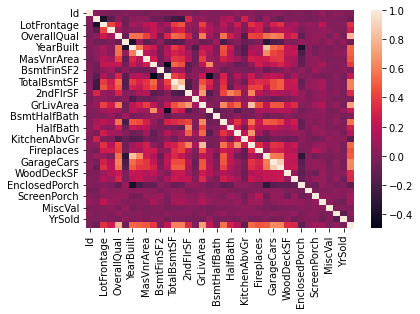

In [125]:
sns.heatmap(nums_scaled.corr())

# Standardize pricing for categoricals

In [148]:
avg_categs = []
avg_categs = pd.DataFrame(avg_categs)
i = 0
for x in categoricals.columns:
    avg_categs[i]=(train['SalePrice'].groupby(train[x]).mean())
    i = i + 1

In [149]:
avg_categs

,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
MSZoning,,,,,,,,,,,,,,,,,,,,,
C (all),74528.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FV,214014.061538,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RH,131558.375000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RL,191004.994787,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RM,126316.830275,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [144]:
avg_categs = pd.DataFrame(avg_categs)
avg_categs

,C (all),FV,RH,RL,RM,Grvl,Pave,IR1,IR2,IR3,...,ConLw,New,Oth,WD,Abnorml,AdjLand,Alloca,Family,Normal,Partial
SalePrice,74528.0,214014.061538,131558.375,191004.994787,126316.830275,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SalePrice,NaN,NaN,NaN,NaN,NaN,130190.5,181130.538514,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SalePrice,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206101.665289,239833.365854,216036.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SalePrice,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SalePrice,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SalePrice,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SalePrice,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SalePrice,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SalePrice,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SalePrice,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
X2 = train['SalePrice'].groupby()
y = nums['SalePrice']

## Add SalePrice back into categoricals to observe correlations

In [72]:
categoricals['SalePrice'] = y

<AxesSubplot:>

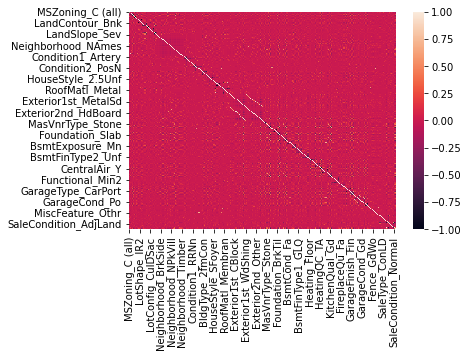

In [73]:
sns.heatmap(categoricals.corr())